# Clothing Detection/Segmentation Demo

A quick intro to using the pre-trained model to detect and segment clothing items.

In [1]:
import os
import sys
import matplotlib
import matplotlib.pyplot as plt
import cv2

# Root directory of the project
ROOT_DIR = os.path.abspath("../")
sys.path.append(ROOT_DIR)
import fashion
import utils_fashion

# Root directory of Mask_RCNN
MASKRCNN_DIR = os.path.abspath("../Mask_RCNN")
sys.path.append(MASKRCNN_DIR)
import mrcnn.model as modellib
from mrcnn import visualize

# Directory to save logs and trained model
MODEL_DIR = os.path.join(MASKRCNN_DIR, "logs")

# Local path to trained weights file
MODEL_PATH = os.path.join(MODEL_DIR, "path/to/mask_rcnn_weights.h5")

# Directory of images to run detection on
IMAGE_DIR = os.path.abspath("../images")

# Data directory containing the labels
DATA_DIR = os.path.join(ROOT_DIR, 'data')
    
%matplotlib inline 
%load_ext autoreload
%autoreload 2

C:\Users\vin_p\Anaconda3\envs\maskrcnn_orig_gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:458: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\vin_p\Anaconda3\envs\maskrcnn_orig_gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:459: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\vin_p\Anaconda3\envs\maskrcnn_orig_gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:460: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\vin_p\Anaconda3\envs\maskrcn

## Configurations

We'll be using a model trained on the fashion dataset. The configurations of this model are in the ```FashionConfig``` class in ```fashion.py```.

For inferencing, modify the configurations a bit to fit the task. To do so, sub-class the ```FashionConfig``` class and override the attributes you need to change.

In [2]:
class InferenceConfig(fashion.FashionConfig):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    #DETECTION_MIN_CONFIDENCE = 0.9 # Skip detections with < 90% confidence
    
config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                59
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'mrcnn_mask_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

## Create Model and Load Trained Weights

In [3]:
# Create model object in inference mode.
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)

# Load weights trained on fashion
model.load_weights(MODEL_PATH, by_name=True)

Re-starting from epoch 3


## Class Names

In [4]:
CLASS_NAMES = utils_fashion.get_labels(DATA_DIR, 'label_descriptions.json')
CLASS_NAMES.insert(0, 'BG')
CLASS_NAMES

['BG',
 'shirt, blouse',
 'top, t-shirt, sweatshirt',
 'sweater',
 'cardigan',
 'jacket',
 'vest',
 'pants',
 'shorts',
 'skirt',
 'coat',
 'dress',
 'jumpsuit',
 'cape',
 'glasses',
 'hat',
 'headband, head covering, hair accessory',
 'tie',
 'glove',
 'watch',
 'belt',
 'leg warmer',
 'tights, stockings',
 'sock',
 'shoe',
 'bag, wallet',
 'scarf',
 'umbrella',
 'hood',
 'collar',
 'lapel',
 'epaulette',
 'sleeve',
 'pocket',
 'neckline',
 'buckle',
 'zipper',
 'applique',
 'bead',
 'bow',
 'flower',
 'fringe',
 'ribbon',
 'rivet',
 'ruffle',
 'sequin',
 'tassel']

## Run Object Detection/Segmentation on sample images

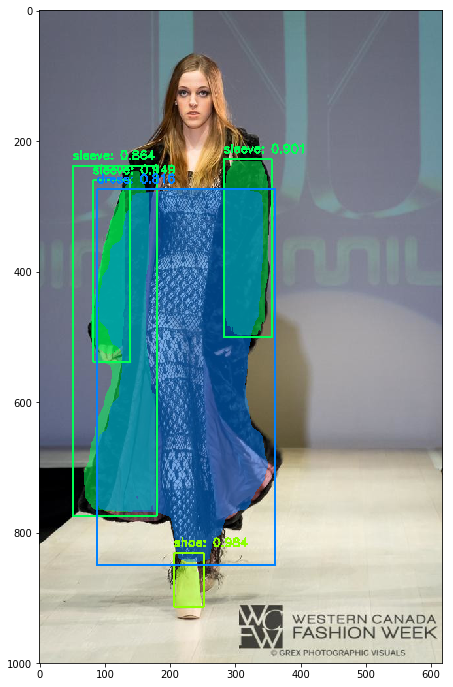

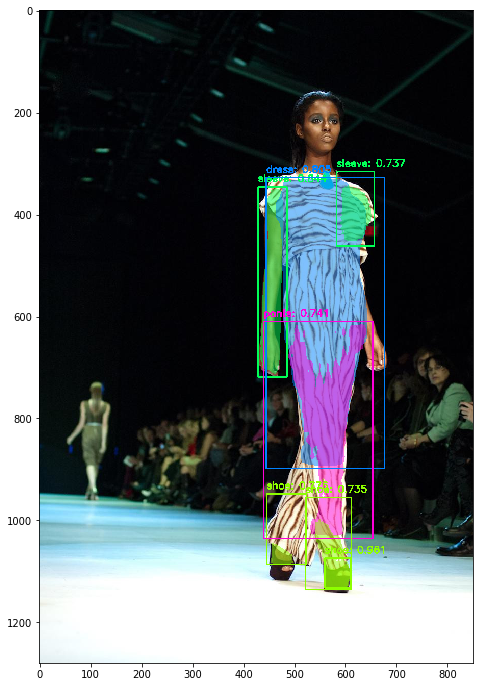

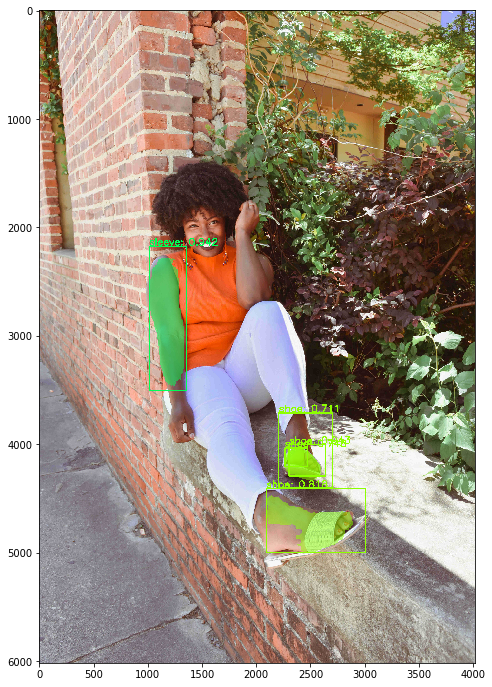

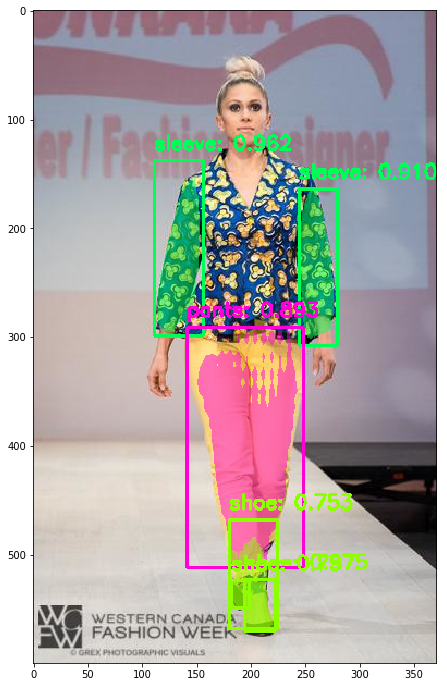

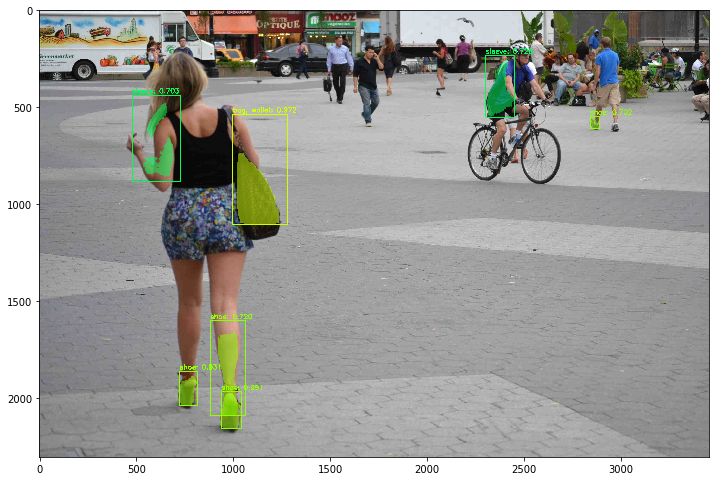

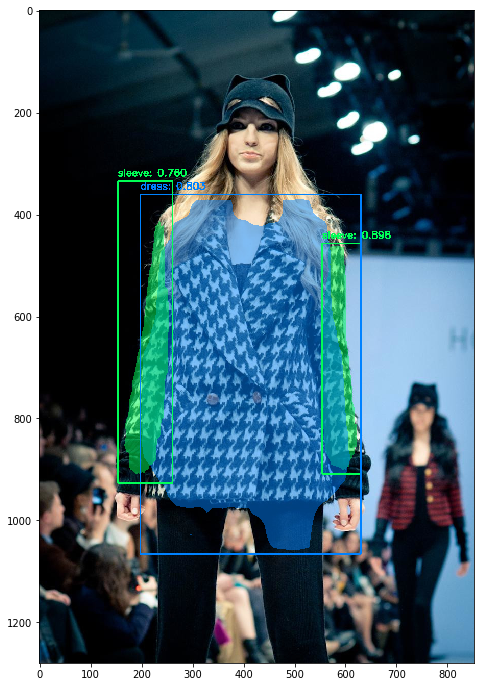

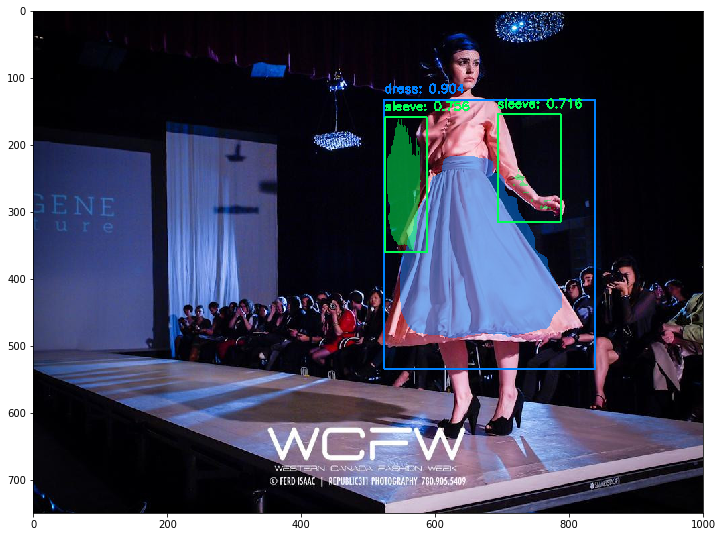

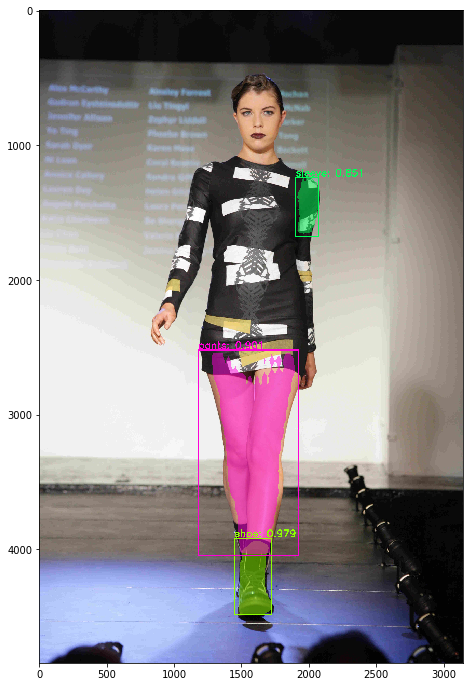

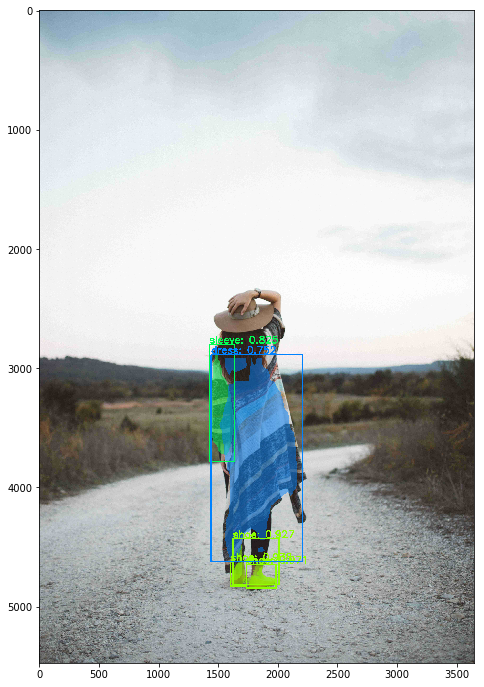

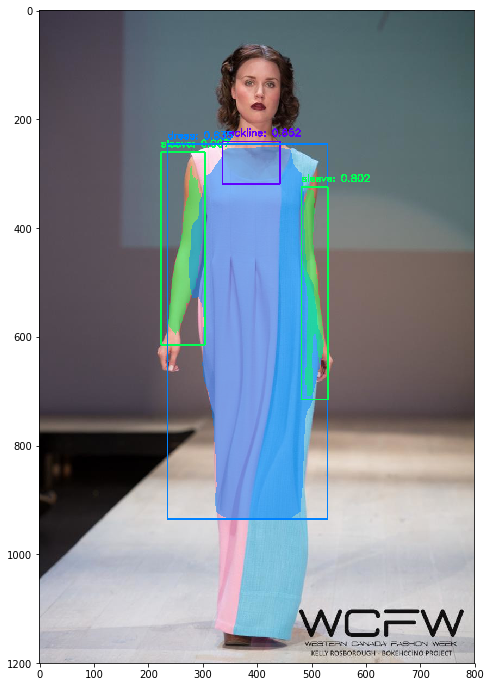

In [5]:
# Load images file names from the images folder
file_names = next(os.walk(IMAGE_DIR))[2]

# generate mask and bbox colors to annotate each label
COLORS = utils_fashion.get_labels_colors(CLASS_NAMES)

# loop through images
for file_name in file_names:
    
    # read image with opencv and convert to RGB for Mask R-CNN input
    image_brg = cv2.imread(os.path.join(IMAGE_DIR, file_name))
    image = cv2.cvtColor(image_brg, cv2.COLOR_BGR2RGB)
    
    # Run Mask R-CNN detection/segmentation
    results = model.detect([image])[0]
    
    # apply mask to each object in the image
    image = utils_fashion.apply_masks_on_image(image, results, COLORS)
        
    # draw bounding boxes, class labels, and score of each detection on the image
    image = utils_fashion.draw_bbox_and_labels_on_image(image, results, COLORS, CLASS_NAMES)
    
    # convert image back to BGR for matplotlib
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    plt.figure(figsize=(12,12))
    plt.imshow(image)
    plt.show()